# **如何擬合多項式函數 $f(x)=6x^2-4x+1$**

#### 此為 simple_linear_regression.ipynb 裡 Exercise 的參考解答

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

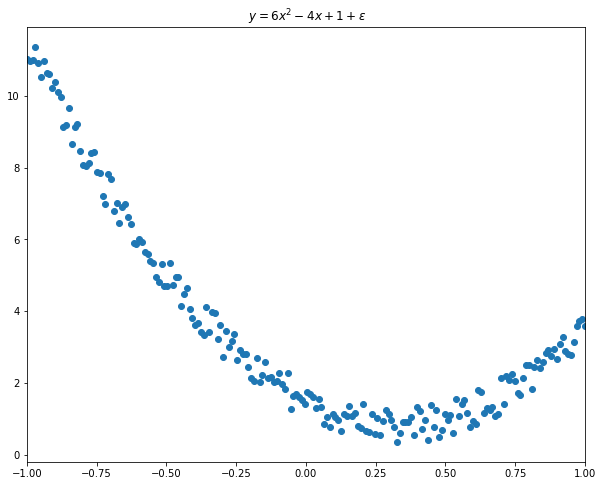

In [2]:
# 準備資料
x_in = np.linspace(-1, 1, 200)
y_true = 6 * x_in**2 - 4 * x_in + 1 + np.random.rand(len(x_in))

# 資料視覺化
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_true)
plt.title(r' $y = 6x^2 -4x + 1 + \epsilon $')
plt.axis(xmin=-1, xmax=1)
plt.show()

In [3]:
# 將訓練資料看為二維的資料 X = (x^2, x)
X = np.stack((np.square(x_in), x_in), axis=1)

In [4]:
# 建構模型
model = keras.Sequential()
model.add(layers.Dense(1, use_bias=True, input_shape=(2,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 編譯模型用以訓練 (設定 optimizer, loss function, metrics, 等等)
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [6]:
# 訓練模型
model.fit(X, y_true, epochs=50)  # 一個 epoch 會看過一次所有的資料

Train on 200 samples
Epoch 1/50
200/200 [==============================] - 1s 3ms/sample - loss: 10.1399
Epoch 2/50
200/200 [==============================] - 0s 59us/sample - loss: 3.0671
Epoch 3/50
200/200 [==============================] - 0s 65us/sample - loss: 1.9478
Epoch 4/50
200/200 [==============================] - 0s 67us/sample - loss: 1.3985
Epoch 5/50
200/200 [==============================] - 0s 78us/sample - loss: 1.0810
Epoch 6/50
200/200 [==============================] - 0s 65us/sample - loss: 0.8674
Epoch 7/50
200/200 [==============================] - 0s 69us/sample - loss: 0.7006
Epoch 8/50
200/200 [==============================] - 0s 70us/sample - loss: 0.5647
Epoch 9/50
200/200 [==============================] - 0s 74us/sample - loss: 0.4731
Epoch 10/50
200/200 [==============================] - 0s 67us/sample - loss: 0.3924
Epoch 11/50
200/200 [==============================] - 0s 68us/sample - loss: 0.3286
Epoch 12/50
200/200 [==============================] 

In [7]:
# 檢視訓練後的權重值
W_pred = model.get_weights()[0]
b_pred = model.get_weights()[1]
print('W_pred:\n', W_pred, '\nb_pred:\n', b_pred)

W_pred:
 [[ 6.090077 ]
 [-3.9386337]] 
b_pred:
 [1.5129001]


In [8]:
# 模型預測
y_pred = model.predict(X)

Text(0.5, 1.0, ' Approaching function $ y = 6.0901x^2 + -3.9386x + 1.5129 + \\epsilon $')

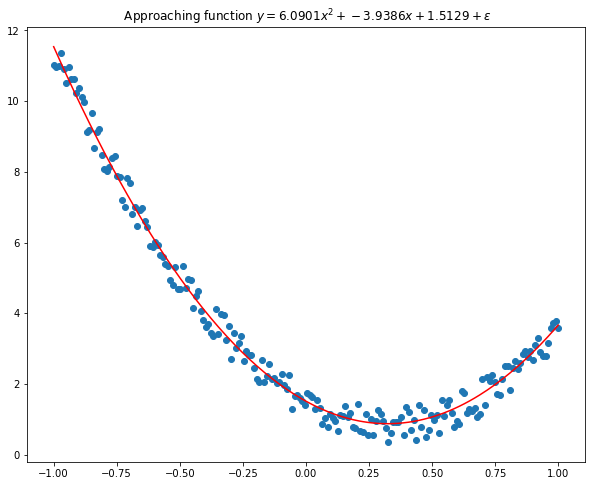

In [9]:
# 視覺化結果
plt.figure(figsize=(10, 8))
plt.scatter(x_in, y_true)
plt.plot(x_in, y_pred, 'r')
plt.title(r' Approaching function $ y = %1.4fx^2 + %1.4fx + %1.4f + \epsilon $'
          % (W_pred[0], W_pred[1], b_pred[0]))

# **如果 target 與 data 之間的關係十分複雜且是非線性，怎麼設計架構？**

* ## **透過深層 (hidden layers)、寬廣 (neurons) 的網路增加複雜度**

### 類神經網路中皆是以上層輸入的線性組合作為這一層的輸出（也就是矩陣相乘），則輸出和輸入依然脫離不了線性關係。

* ## **透過激活函數 (Activation function) 增加非線性因子**